## Notebook for meta analysis of experiments (e.g. determining exclusion criteria)

In [3]:
%run ./rob_setup_notebook.ipynb

from ia_funcs import *
import utils.STAMovieMaker_noGUI as STAMM
import utils.gsheets_importer as gsi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Suite2p path: ['/home/rlees/Documents/Code/suite2p/suite2p']
QNAP_path: /home/rlees/mnt/qnap 
QNAP_data_path /home/rlees/mnt/qnap/Data 
Pickle folder: /home/rlees/mnt/qnap/pkl_files 
Master pickle: /home/rlees/mnt/qnap/master_pkl/master_obj.pkl 
Figure save path: /home/rlees/mnt/qnap/Analysis/Figures 
STA movie save path: /home/rlees/mnt/qnap/Analysis/STA_movies 
S2 borders path: /home/rlees/mnt/qnap/Analysis/S2_borders


### Define list of pickled objects to meta analyse

In [4]:
pkl_list = [
            '2019-06-11_J048.pkl',
            '2019-06-13_J052.pkl',
            '2019-06-25_RL048.pkl',
            '2019-07-15_RL052.pkl',
            '2019-08-14_J058.pkl',
            '2019-08-14_J059.pkl',
            '2019-08-15_RL055.pkl',
            '2019-11-14_J061.pkl',
            '2019-11-14_J063.pkl',
            '2019-11-15_J064.pkl',
            '2019-11-18_J065.pkl',
            '2020-02-27_RL075.pkl',
            '2020-03-03_RL074.pkl',
            '2020-03-05_RL070.pkl',
            '2020-03-05_RL072.pkl',
#             '2020-03-12_RL070.pkl',
#             '2020-03-16_RL074.pkl',
#             '2020-03-19_RL075.pkl',
#             '2020-03-20_RL080.pkl'
#             '2020-06-03_RL086.pkl',
#             '2020-06-08_RL086.pkl'
           ]

for i,pkl in enumerate(pkl_list):
    pkl_list[i] = os.path.join(qnap_path, 'pkl_files', pkl)

print(pkl_list)

['/home/rlees/mnt/qnap/pkl_files/2019-06-11_J048.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-06-13_J052.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-06-25_RL048.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-07-15_RL052.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-08-14_J058.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-08-14_J059.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-08-15_RL055.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-11-14_J061.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-11-14_J063.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-11-15_J064.pkl', '/home/rlees/mnt/qnap/pkl_files/2019-11-18_J065.pkl', '/home/rlees/mnt/qnap/pkl_files/2020-02-27_RL075.pkl', '/home/rlees/mnt/qnap/pkl_files/2020-03-03_RL074.pkl', '/home/rlees/mnt/qnap/pkl_files/2020-03-05_RL070.pkl', '/home/rlees/mnt/qnap/pkl_files/2020-03-05_RL072.pkl']


### Make STA movies and images

In [8]:
for pkl in pkl_list:
    
    with open(pkl, 'rb') as f:
        ses_obj = pickle.load(f)

    exp_list = [ses_obj.photostim_r, ses_obj.photostim_s]

    if ses_obj.spont.n_frames > 0:
        exp_list.append(ses_obj.spont)

    if ses_obj.whisker_stim.n_frames > 0:
        exp_list.append(ses_obj.whisker_stim)

    for exp_obj in exp_list:

        for file in os.listdir(exp_obj.tiff_path):
            if '.tif' in file:
                movie_path = os.path.join(exp_obj.tiff_path, file)
                break
        
        if exp_obj.stim_type == 'none':
            sync_path = ses_obj.photostim_r.paq_path
            stim_channel = ses_obj.photostim_r.stim_channel
        else:
            sync_path = exp_obj.paq_path
            stim_channel = exp_obj.stim_channel

        print('Movie_path:', movie_path,
              '\nSync_path:', sync_path)

        arg_dict = {'moviePath' : movie_path, # hard-code this
                    'savePath' : stam_save_path,
                    'syncFrameChannel' : 'frame_clock',
                    'syncStimChannel' : stim_channel,
                    'syncStartSec' : 0,
                    'syncStopSec' : 0,
                    'numDiffStims' : 1,
                    'startOnStim' : 1,
                    'everyXStims' : 1,
                    'preSeconds' : 1,
                    'postSeconds' : 3,
                    'frameRate' : round(exp_obj.fps),
                    'averageImageStart' : 0.5,
                    'averageImageStop' : 1.5,
                    'methodDF' : False,
                    'methodDFF' : True,
                    'methodZscore' : False,
                    'syncPath' : sync_path,
                    'zPlanes' : exp_obj.n_planes,
                    'useStimOrder' : False,
                    'stimOrder' : [],
                    'useSingleTrials' : False,
                    'doThreshold' : False,
                    'threshold' : 0,
                    'colourByTime' : False,
                    'useCorrelationImage' : False,
                    'blurHandS' : False,
                    'makeMaxImage' : True,
                    'makeColourImage' : False
                   }

        STAMM.STAMovieMaker(arg_dict);
            
# staMovie(stam_save_path, pkl_list) # old function that used lots of RAM

Movie_path: /home/rlees/mnt/qnap/Data/2020-06-08/RL086/2020-06-08_RL086_t-007/2020-06-08_RL086_t-007_Cycle00001_Ch3.tif 
Sync_path: /home/rlees/mnt/qnap/Data/2020-06-08/RL086/2020-06-08_RL086_t-007.paq
Loading sync file
Loading movie
Plane 1 of 1. Stim 1 of 1 (100 trials)
Plane 1 of 1. Stim 1 of 1 (100 trials) - Raw
Plane 1 of 1. Stim 1 of 1 (100 trials) - dFF
Movie_path: /home/rlees/mnt/qnap/Data/2020-06-08/RL086/2020-06-08_RL086_t-006/2020-06-08_RL086_t-006_Cycle00001_Ch3.tif 
Sync_path: /home/rlees/mnt/qnap/Data/2020-06-08/RL086/2020-06-08_RL086_t-006.paq
Loading sync file
Loading movie
Plane 1 of 1. Stim 1 of 1 (100 trials)
Plane 1 of 1. Stim 1 of 1 (100 trials) - Raw
Plane 1 of 1. Stim 1 of 1 (100 trials) - dFF
Movie_path: /home/rlees/mnt/qnap/Data/2020-06-08/RL086/2020-06-08_RL086_t-005/2020-06-08_RL086_t-005_Cycle00001_Ch3.tif 
Sync_path: /home/rlees/mnt/qnap/Data/2020-06-08/RL086/2020-06-08_RL086_t-007.paq
Loading sync file
Loading movie
Plane 1 of 1. Stim 1 of 1 (100 trials)
P

### Retrieve suite2p masks

In [5]:
# Save a stack of masks from suite2p along with mean image and STA images
# in the order: mean image, all rois, cells, s2, pr targets, ps targets, 
# whisker responsive, pr STA image, ps STA image

parent_folder = os.path.join(qnap_path, 'Analysis', 'Suite2p_masks')
s2pMaskStack(pkl_list, stam_save_path, parent_folder)

### Plot average cellular fluorescence across session

Measuring mean cell fluorescence for: /home/rlees/mnt/qnap/pkl_files/2020-03-05_RL072.pkl               
Plotting mean cell fluorescence...


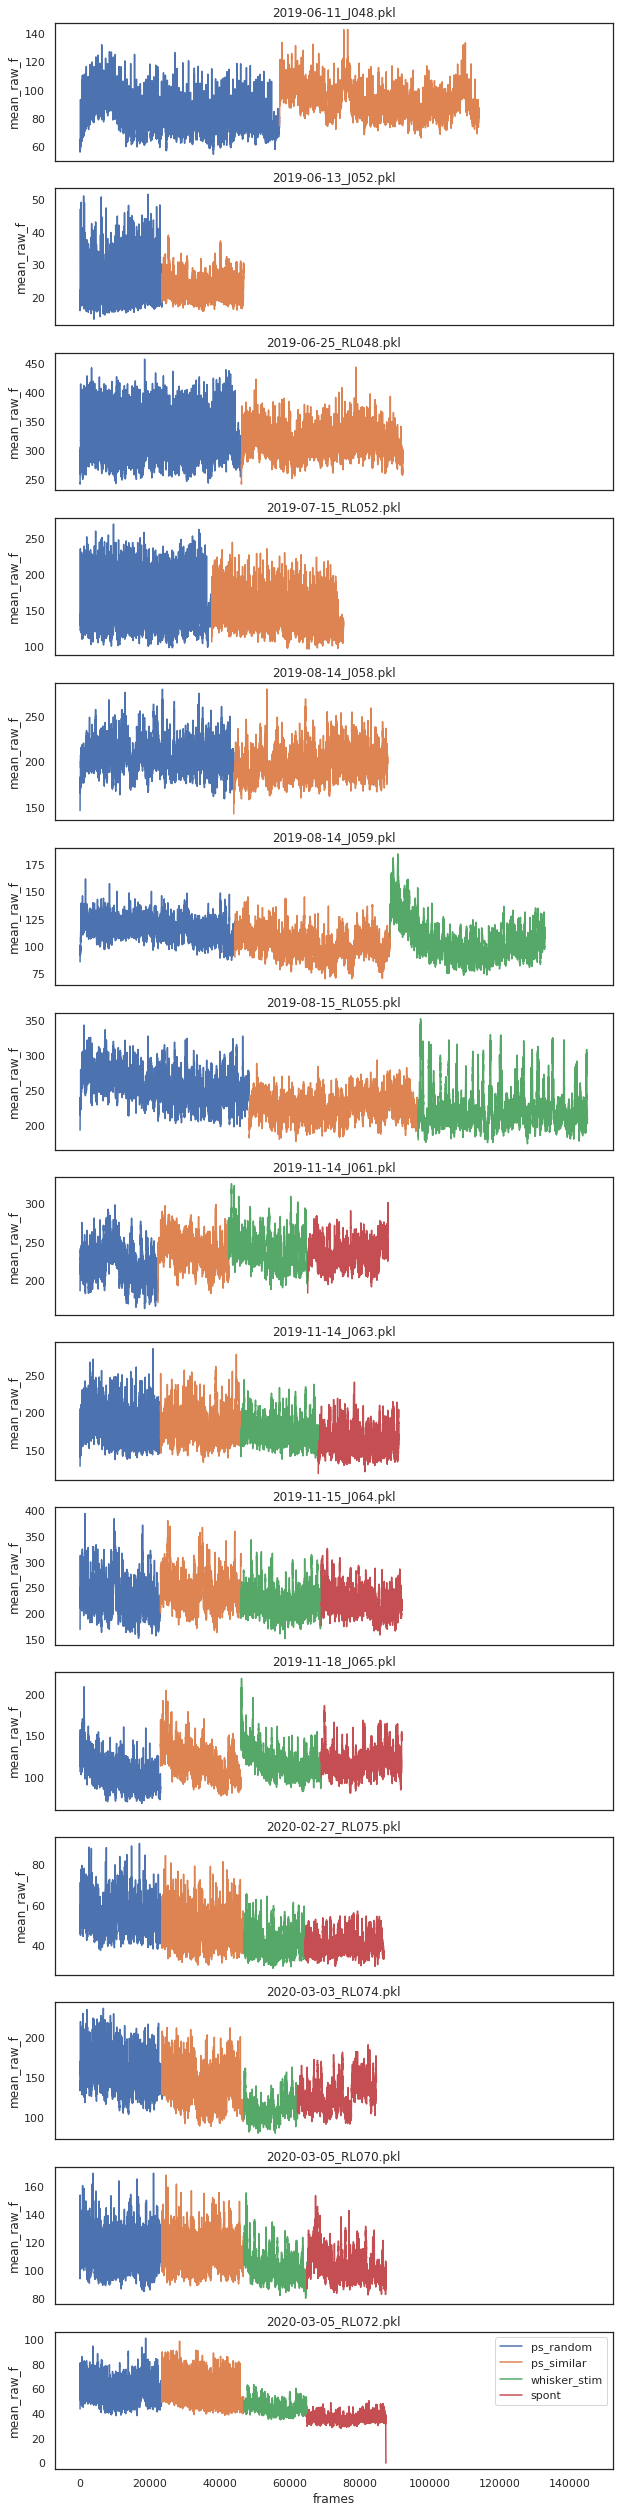

In [14]:
cellFluTime(pkl_list, trial_types='pr ps', cell_type='targets')
plt.savefig(os.path.join(fig_save_path, 'cell_fluorescence_time_targets.png'));

### Make downsampled stack of first 1000 and last 1000 frames of each experiment for all sessions

In [ ]:
save_path = os.path.join(qnap_path, 'Analysis', 'Drift_check', 'Raw')
downsampleTiff(pkl_list, save_path)

### Plot frame fluorescence over time for each experiment in all sessions

In [ ]:
data_folder = os.path.join(qnap_path, 'Analysis', 'Drift_check', 'Stacks')
frameFluTime(data_folder, legend=False)
plt.savefig(os.path.join(fig_save_path, 'frame_fluorescence_time.svg'));

### Combine two iscell.npy Suite2p output files

In [7]:
for pkl in pkl_list:
        
    pkl_path = os.path.join(pkl_folder, pkl)

    with open(pkl_path, 'rb') as f:
        ses_obj = pickle.load(f)

    s2p_path = ses_obj.s2p_path
    extra_iscell_path = os.path.join(qnap_path, 'iscell_manual_backup', ses_obj.sheet_name + '_iscell.npy')

    # s2p_path is used to find current iscell file and extra iscell file is added to it
    # backup iscell file is made first before saving new iscell.npy file
    combineIscell(s2p_path, extra_iscell_path)
    
    print('Combined iscell.npy files for', pkl, '...       ', end='\r')

### Plot cell STA trace, mask, mean and STA images for top ten cells 

/home/rlees/mnt/qnap/pkl_files/2019-06-11_J048.pkl


/home/rlees/Documents/Code/Vape/jupyter/rob/ia_funcs.py:529: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax[0,i].imshow(cell_im)
/home/rlees/Documents/Code/Vape/jupyter/rob/ia_funcs.py:541: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax[2,i].imshow(sta_cell, vmin=0, vmax=25)


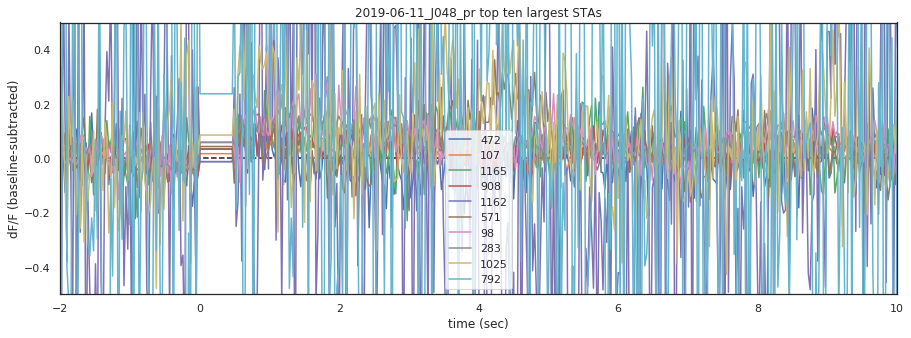

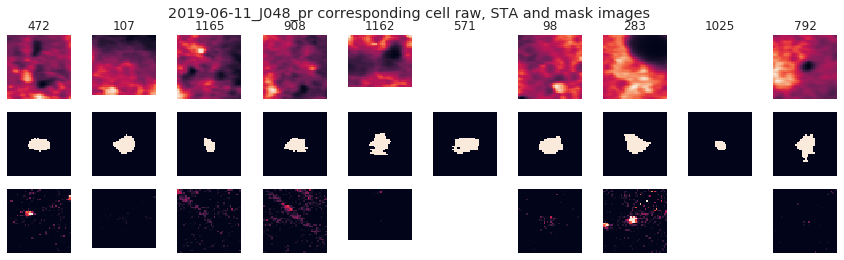

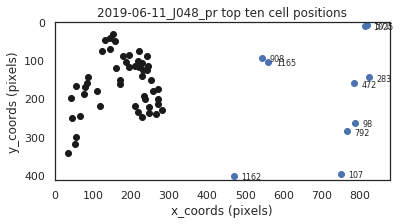

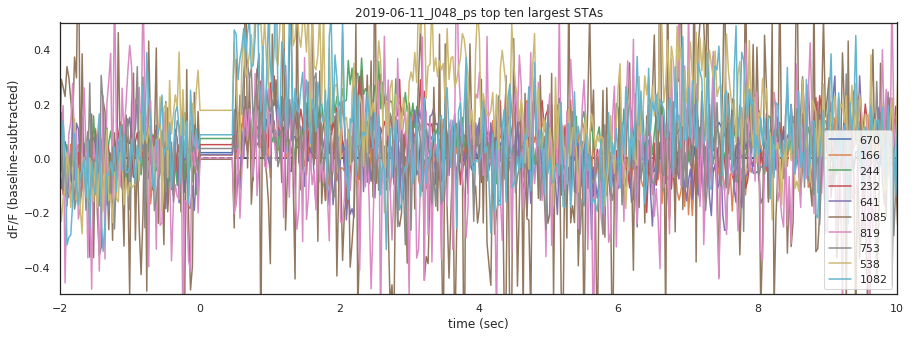

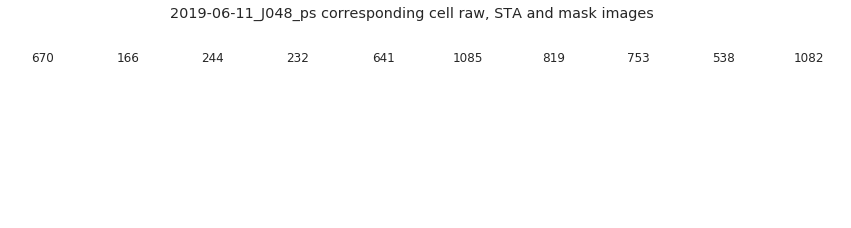

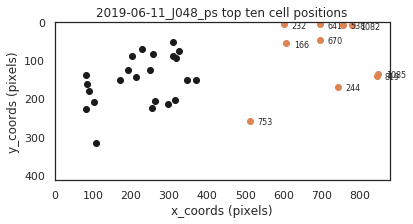

/home/rlees/mnt/qnap/pkl_files/2019-06-13_J052.pkl


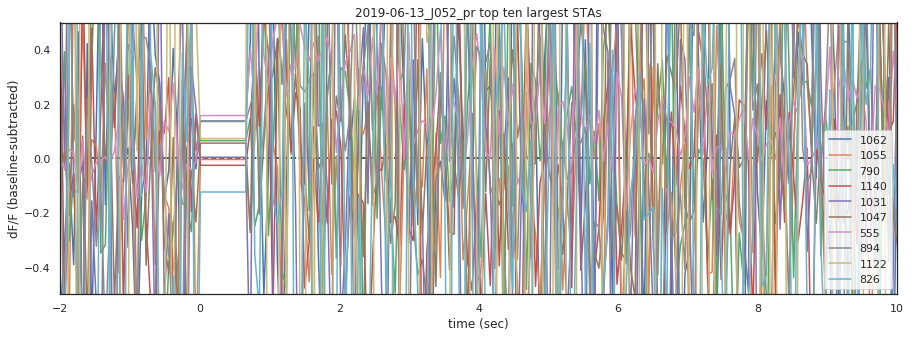

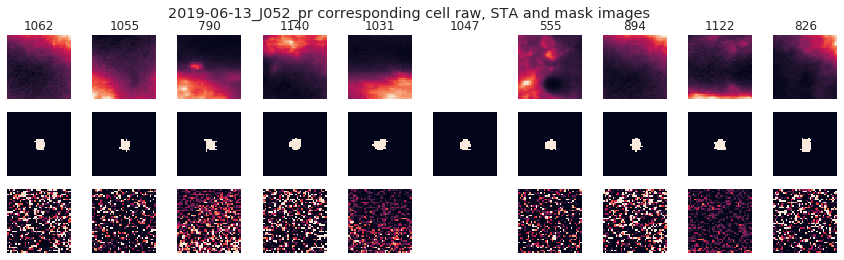

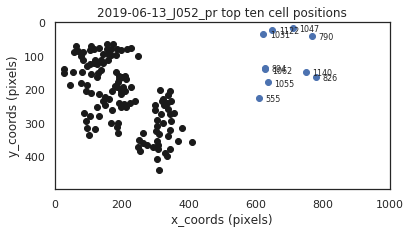

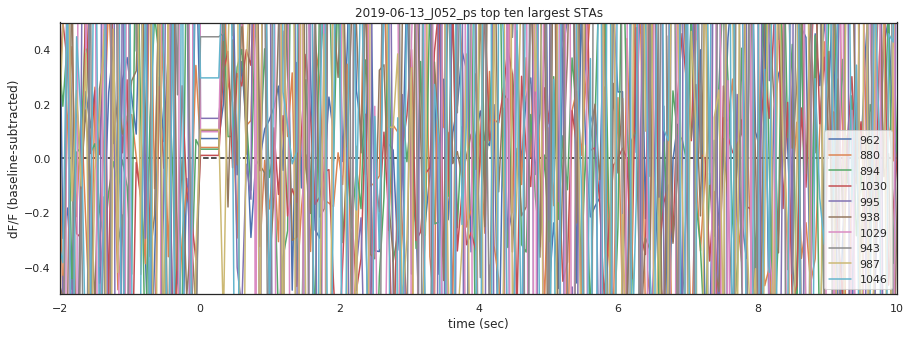

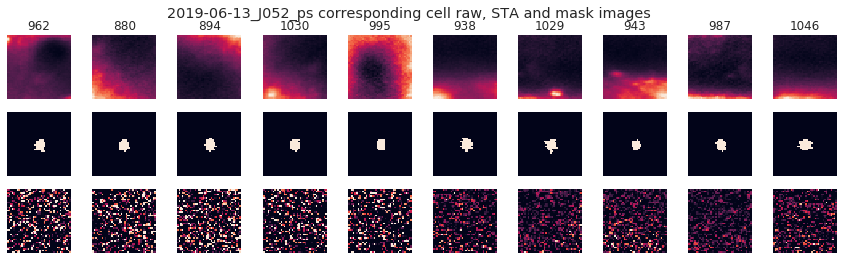

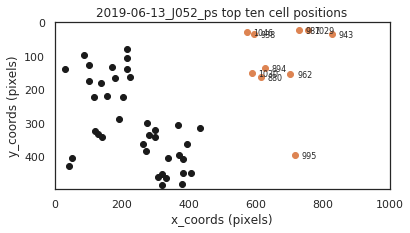

/home/rlees/mnt/qnap/pkl_files/2019-06-25_RL048.pkl


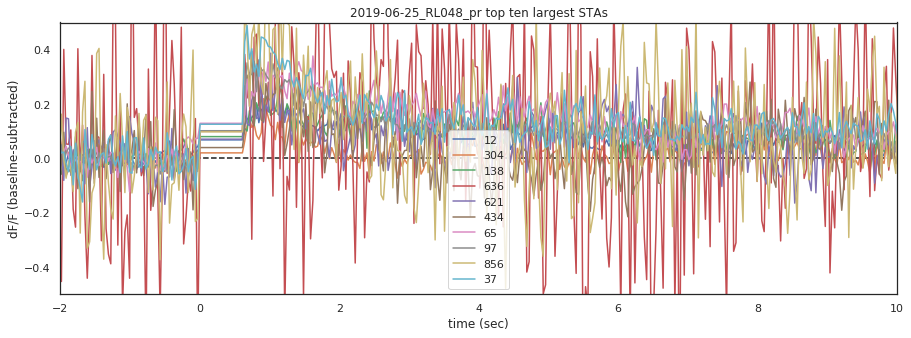

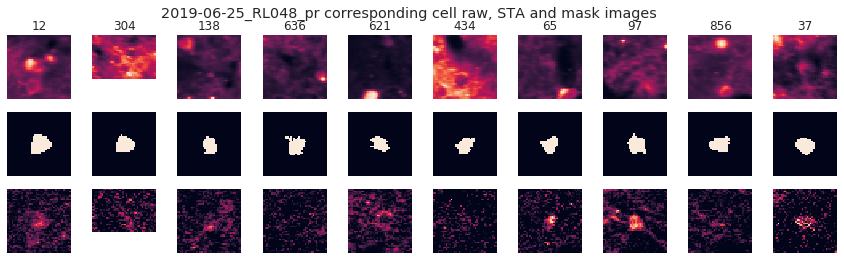

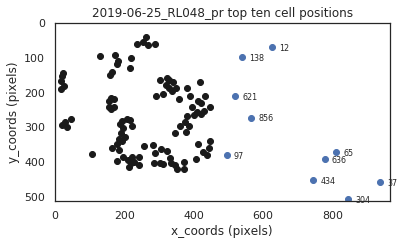

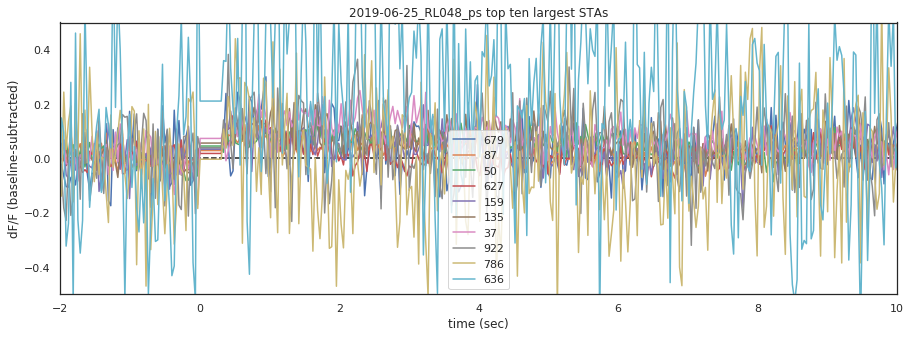

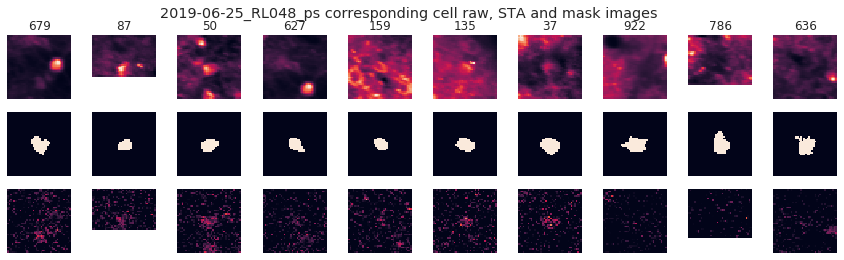

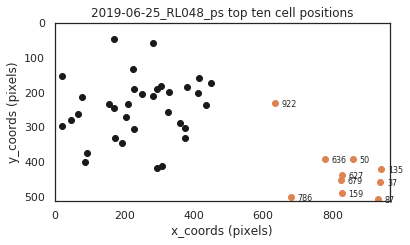

/home/rlees/mnt/qnap/pkl_files/2019-07-15_RL052.pkl


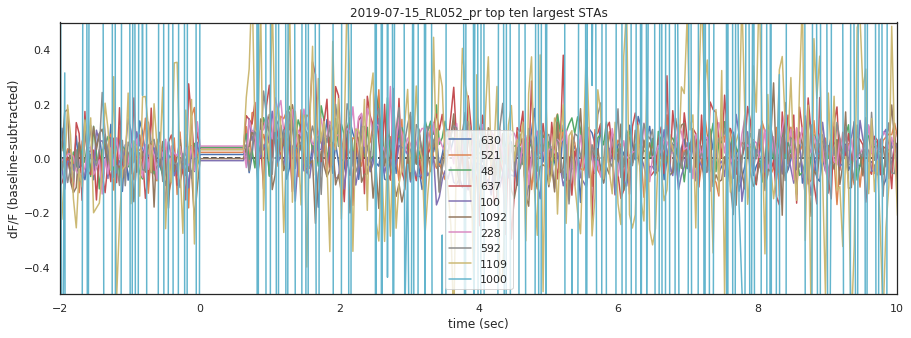

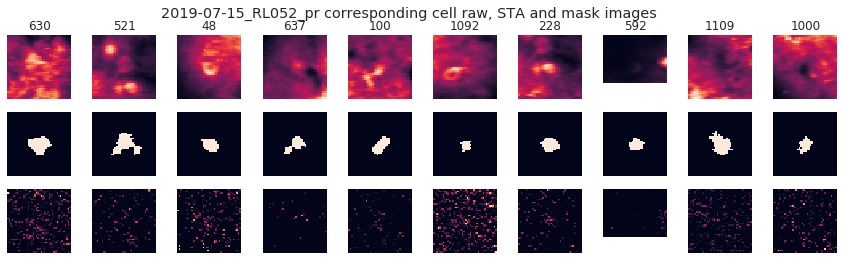

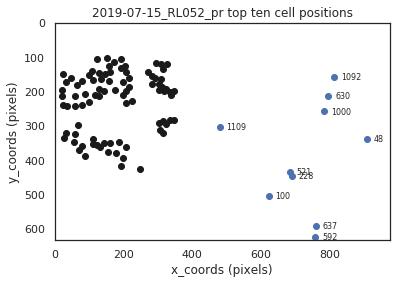

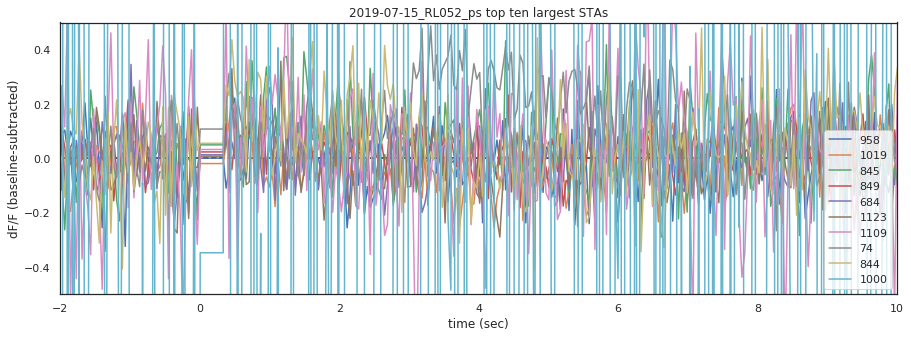

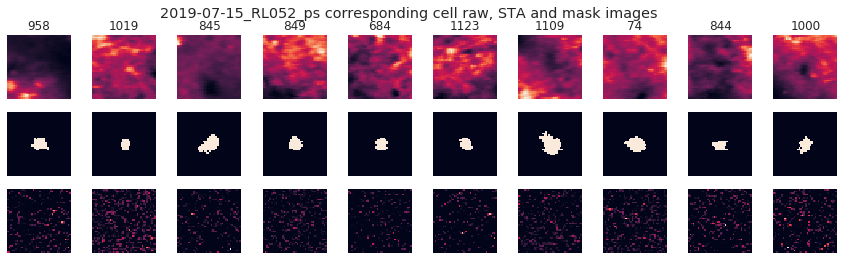

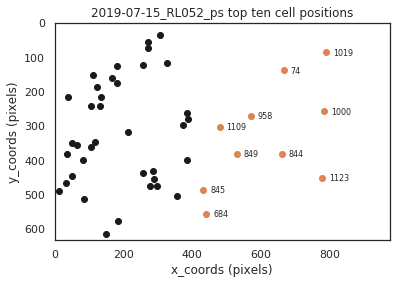

/home/rlees/mnt/qnap/pkl_files/2019-08-14_J058.pkl


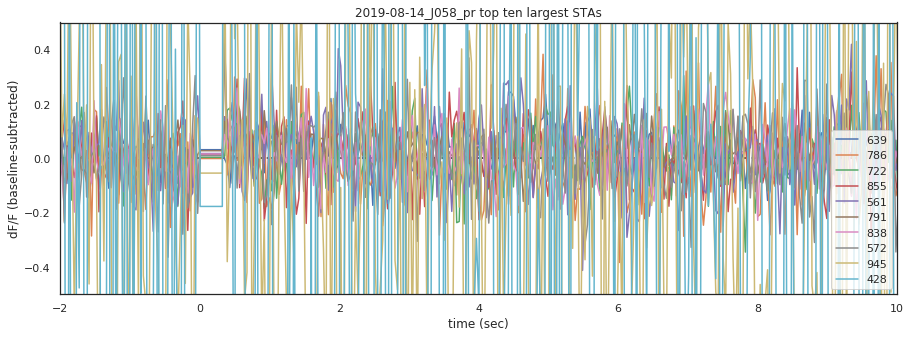

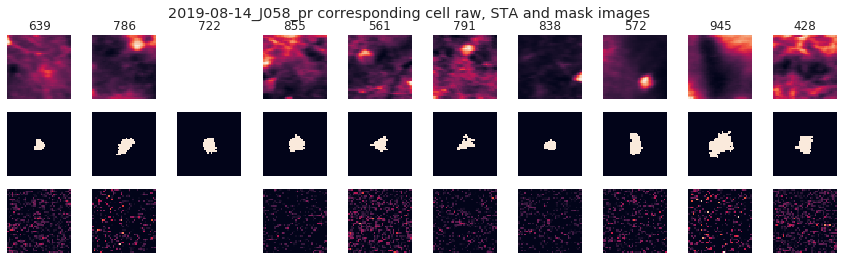

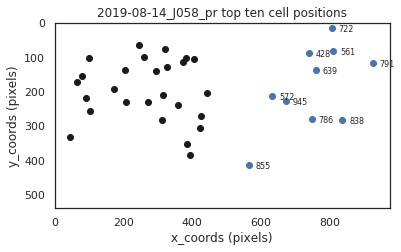

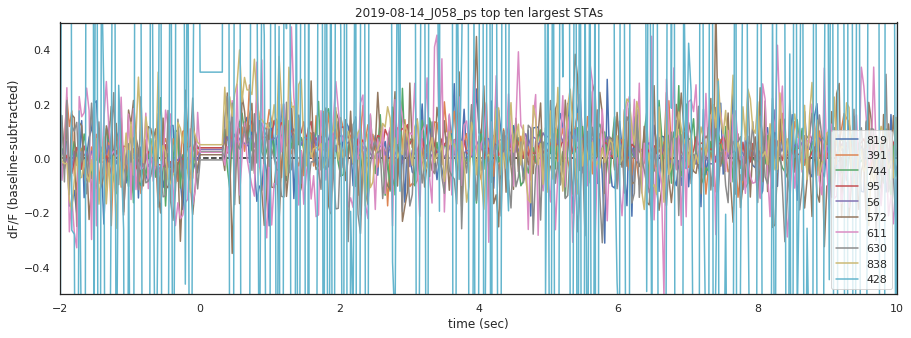

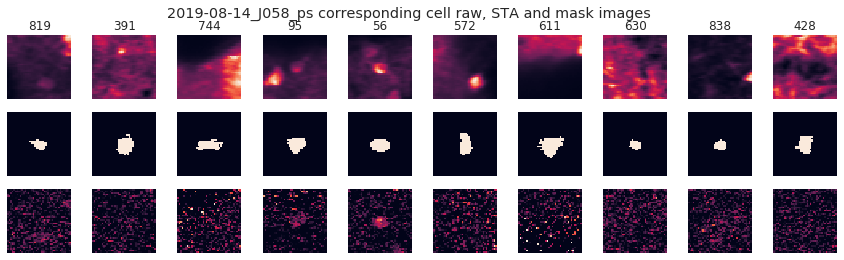

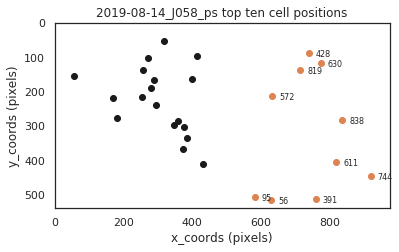

/home/rlees/mnt/qnap/pkl_files/2019-08-14_J059.pkl


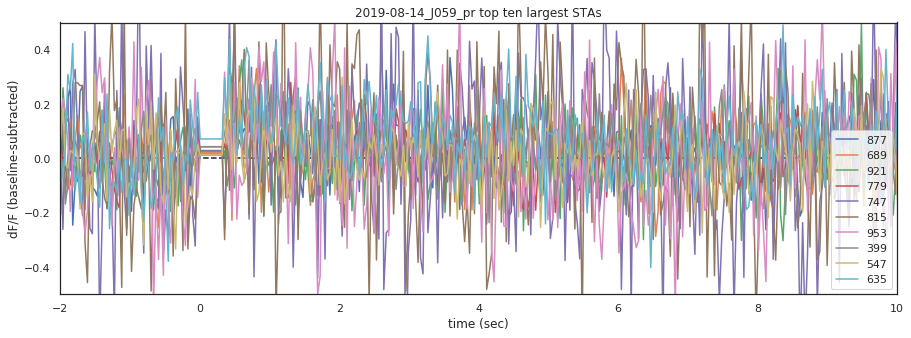

KeyboardInterrupt: 

In [3]:
keep ='all' # whether to consider all cells, only sig STA or only non-sig STA
save_path = os.path.join(fig_save_path, 'top_ten_all_s2_cells') # save path for figures
save = False # whether to save figures

pkl_files = os.listdir(pkl_folder)

for i,pkl in enumerate(pkl_files):
    if '.pkl' in pkl:
        
        pkl_path = os.path.join(pkl_folder, pkl)
        print(pkl_path)

        with open(pkl_path, 'rb') as f:
            ses_obj = pickle.load(f)

        exp_list = []
        exp_list.extend([ses_obj.photostim_r, ses_obj.photostim_s])
#         exp_list.append(ses_obj.spont if ses_obj.spont.n_frames > 0 else [])            
#         exp_list.append(ses_obj.whisker_stim if ses_obj.whisker_stim.n_frames > 0 else [])

        for i,obj in enumerate(exp_list):
            
            cell_ids = np.arange(obj.n_units[0]) # all cells
#             cell_ids = np.where(obj.cell_s2[0]) # s2 cells only
#             cell_ids = np.where(obj.cell_s1[0]) # s1 cells only
            sta_amplitudes = np.array(obj.sta_amplitudes[0][cell_ids])

            if keep == 'sig':    
                delete = ~obj.sta_sig[0][cell_ids] # ids to remove
            elif keep == 'non-sig':
                delete = obj.sta_sig[0][cell_ids]
            elif keep == 'all':
                delete = []
                
            sta_amplitudes = np.delete(sta_amplitudes, np.where(delete)) 
            cell_ids = np.delete(cell_ids, np.where(delete))

            top_ten_cell_ids = topTenCells(sta_amplitudes, cell_ids)
            
            if top_ten_cell_ids.any():
                
                plotCellSTAs(obj, top_ten_cell_ids, save_path, save=save)
                plt.axis([-2, 10, -0.5, 0.5]);
                plotCellMasks(obj, top_ten_cell_ids, stam_save_path, save_path, save=save)
                plotCellPositions(obj, top_ten_cell_ids, save_path, save=save)
                plt.show()

### Plot cell STA trace, mask, mean and STA images for bottom ten cells 

/home/rlees/mnt/qnap/pkl_files/2019-11-14_J061.pkl


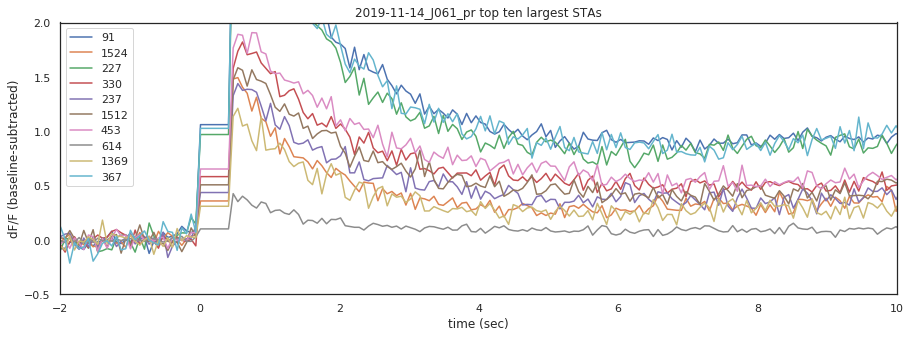

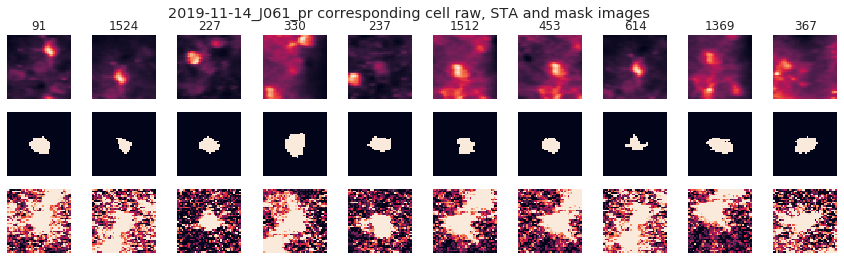

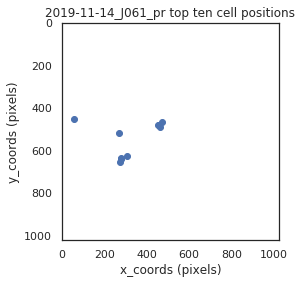

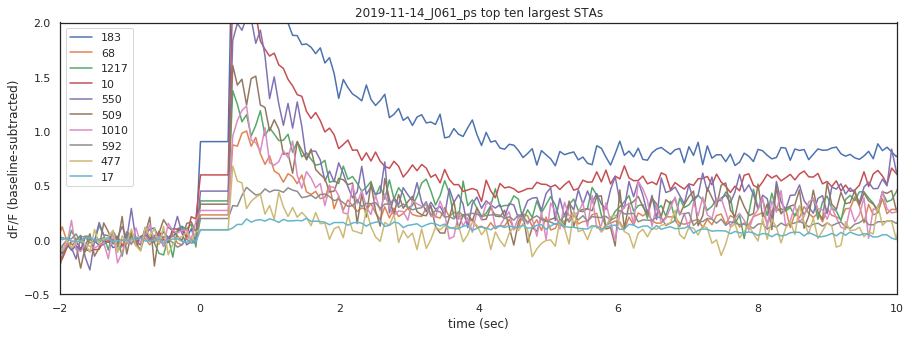

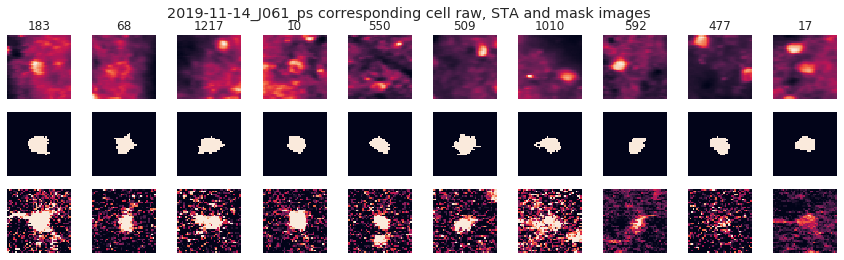

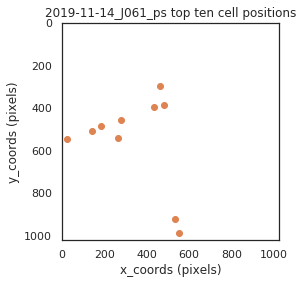

In [13]:
keep ='all' # whether to consider all cells, only sig STA or only non-sig STA
save_path = os.path.join(fig_save_path, 'bottom_ten_all_cells_p_value') # save path for figures
save = True # whether to save figures

pkl_files = os.listdir(pkl_folder)

for i,pkl in enumerate(pkl_files):
    if 'J061.pkl' in pkl:
        
        pkl_path = os.path.join(pkl_folder, pkl)
        print(pkl_path)

        with open(pkl_path, 'rb') as f:
            ses_obj = pickle.load(f)

        exp_list = []
        exp_list.extend([ses_obj.photostim_r, ses_obj.photostim_s])
#         exp_list.append(ses_obj.spont if ses_obj.spont.n_frames > 0 else [])            
#         exp_list.append(ses_obj.whisker_stim if ses_obj.whisker_stim.n_frames > 0 else [])

        for i,obj in enumerate(exp_list):
            
            cell_ids = np.arange(obj.n_units[0]) # all cells
#             cell_ids = np.where(obj.cell_s2[0]) # s2 cells only
#             cell_ids = np.where(obj.cell_s1[0]) # s1 cells only
            t_tests = np.array(obj.t_tests[0][cell_ids])

            if keep == 'sig':    
                delete = ~obj.sta_sig[0][cell_ids] # ids to remove
            elif keep == 'non-sig':
                delete = obj.sta_sig[0][cell_ids]
            elif keep == 'all':
                delete = []
                
            t_tests = np.delete(t_tests, np.where(delete)) 
            cell_ids = np.delete(cell_ids, np.where(delete))

            bottom_ten_cell_ids = bottomTenCells(t_tests, cell_ids)
            
            if bottom_ten_cell_ids.any():
                
                plotCellSTAs(obj, bottom_ten_cell_ids, save_path, save=save)
                plt.axis([-2, 10, -0.5, 2]);
                plotCellMasks(obj, bottom_ten_cell_ids, stam_save_path, save_path, save=save)
                plotCellPositions(obj, bottom_ten_cell_ids, save_path, save=save)
                plt.show()

### Plot time and space of responses over trials and cells

/home/rlees/mnt/qnap/pkl_files/2019-11-14_J061.pkl


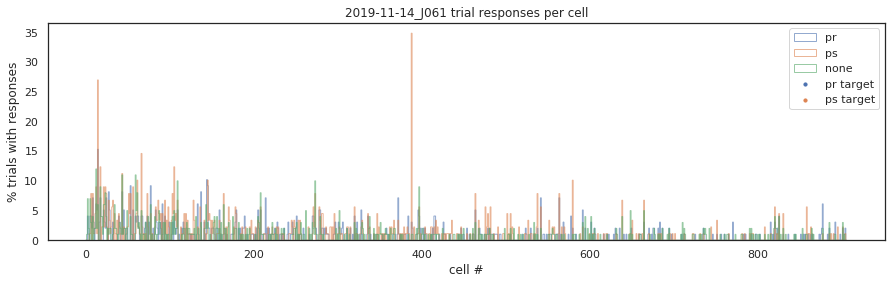

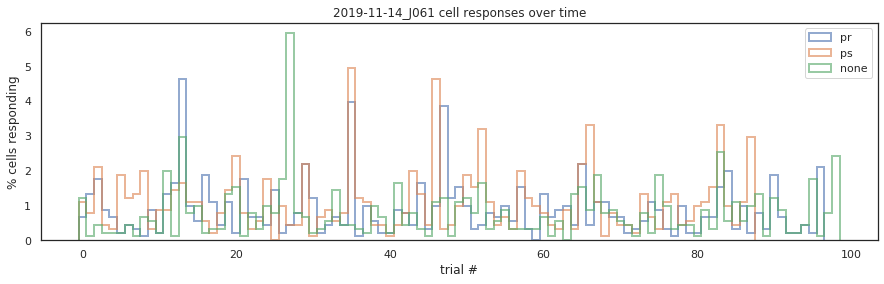

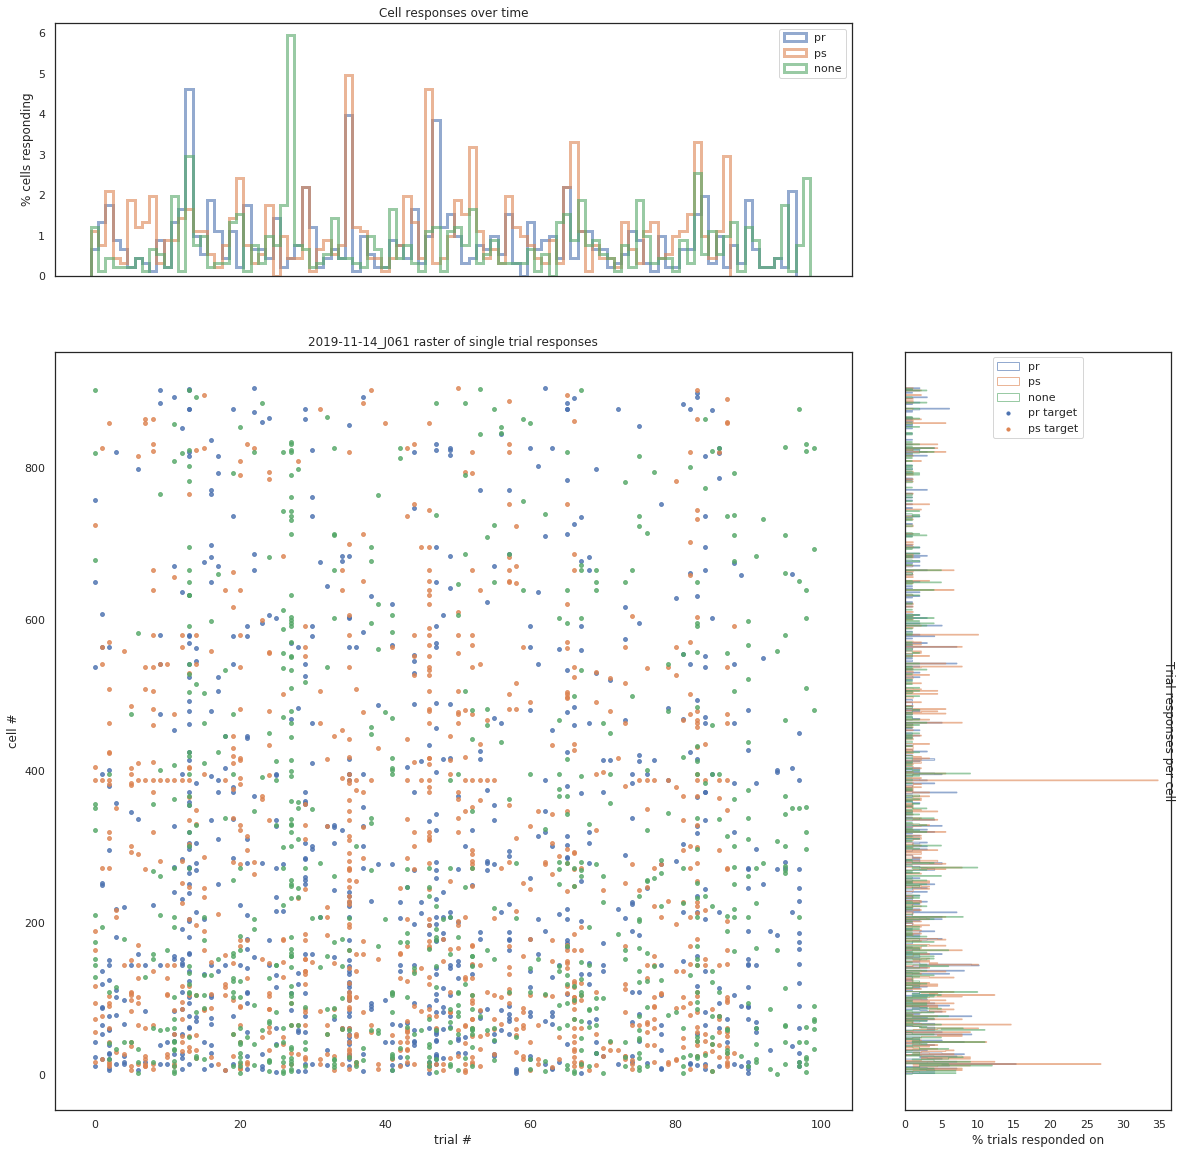

In [15]:
save = False

pkl_files = os.listdir(pkl_folder)

for i,pkl in enumerate(pkl_files):
    if 'J061.pkl' in pkl:
        
        pkl_path = os.path.join(pkl_folder, pkl)
        print(pkl_path)

        with open(pkl_path, 'rb') as f:
            ses_obj = pickle.load(f)
        
        save_path = os.path.join(fig_save_path, 'frequency_responses', 'photostim_trials', ses_obj.sheet_name) # save path for figures
        
        exp_list = []
        exp_list.extend([ses_obj.photostim_r, ses_obj.photostim_s])
        exp_list.append(ses_obj.spont if ses_obj.spont.n_frames > 0 else [])            
#         exp_list.append(ses_obj.whisker_stim if ses_obj.whisker_stim.n_frames > 0 else [])
        
        cell_fig, cell_ax = plt.subplots(nrows=1, ncols=1, figsize=(15,4))
        trial_fig, trial_ax = plt.subplots(nrows=1, ncols=1, figsize=(15,4))
        raster_fig, raster_ax = plt.subplots(nrows=2, ncols=2, 
                           figsize=(20,20), 
                           gridspec_kw={'height_ratios':[1,3],
                                        'width_ratios':[3,1],
                                        'wspace': 0.1, 
                                        'hspace': 0.15},
                           sharex='col', sharey='row');

        for i,obj in enumerate(exp_list):
            
            trial_bool = obj.trial_sig_dff[0]
#             cells_bool = obj.sta_sig[0] # significant cells over 100 trials
#             cells_bool = obj.targeted_cells # targeted cells
            cells_bool = obj.cell_s2[0]
#             cells_bool = np.ones(obj.n_units[0], dtype='bool') # all cells
            
            # continue through loop if there are no cells of interest
            if np.sum(cells_bool) == 0:
                continue
            
            plotResponseFreqTrial(obj, trial_bool, cells_bool, trial_ax)
            plotResponseFreqCell(obj, trial_bool, cells_bool, cell_ax)
            plotCellResponseRaster(obj, trial_bool, cells_bool, raster_ax)
            
        if save:
            cell_fig.savefig(save_path + '_n_cell_responses_trial_s2.png')
            cell_fig.savefig(save_path + '_n_cell_responses_trial_s2.svg')
            
            trial_fig.savefig(save_path + '_n_trial_responses_cell_s2.png')
            trial_fig.savefig(save_path + '_n_trial_responses_cell_s2.svg')
            
            raster_fig.savefig(save_path + '_raster_responses_cell_s2.png')
            raster_fig.savefig(save_path + '_raster_responses_cell_s2.svg')

        plt.show()

### Plot the overall average percentage of cells responding on each trial type

In [4]:
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = [file for file in os.listdir(pkl_folder) if '.pkl' in file]

all_trial_responses = np.full([len(stim_types), len(pkl_files), 100], np.nan)

for i,pkl in enumerate(pkl_files):
    
    print(pkl)
    pkl_path = os.path.join(pkl_folder, pkl)

    with open(pkl_path, 'rb') as f:
        ses_obj = pickle.load(f)

    exp_list = []
    exp_list.extend([ses_obj.photostim_r, 
                     ses_obj.photostim_s])
    if ses_obj.spont.n_frames > 0: exp_list.append(ses_obj.spont)            
    if ses_obj.whisker_stim.n_frames > 0: exp_list.append(ses_obj.whisker_stim)

    for stim_id, stim_type in enumerate(stim_types):

        for _,obj in enumerate(exp_list):
            
            if obj.stim_type == stim_type:
                trial_bool = obj.trial_sig_dff[0]
#                 cells_bool = obj.sta_sig[0] # significant cells over 100 trials
#                 cells_bool = obj.targeted_cells # targeted cells
                cells_bool = obj.cell_s2[0]
#                 cells_bool = np.ones(obj.n_units[0], dtype='bool') # all cells

                # continue through loop if there are no cells of interest
                if np.sum(cells_bool) == 0:
                    continue

                trial_responses, trial_bins = responseFreqTrial(trial_bool, cells_bool)

                n_trials = trial_responses.shape[0]
                all_trial_responses[stim_id, i, :n_trials] = trial_responses

2020-03-05_RL072.pkl
2019-11-14_J061.pkl
2019-11-14_J063.pkl
2019-11-15_J064.pkl
2019-11-18_J065.pkl
2020-02-27_RL075.pkl
2020-03-03_RL074.pkl
2019-08-15_RL055.pkl
2019-06-11_J048.pkl
2019-06-13_J052.pkl
2019-06-25_RL048.pkl
2019-07-15_RL052.pkl
2019-08-14_J058.pkl
2019-08-14_J059.pkl
2020-03-05_RL070.pkl


/home/rlees/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.


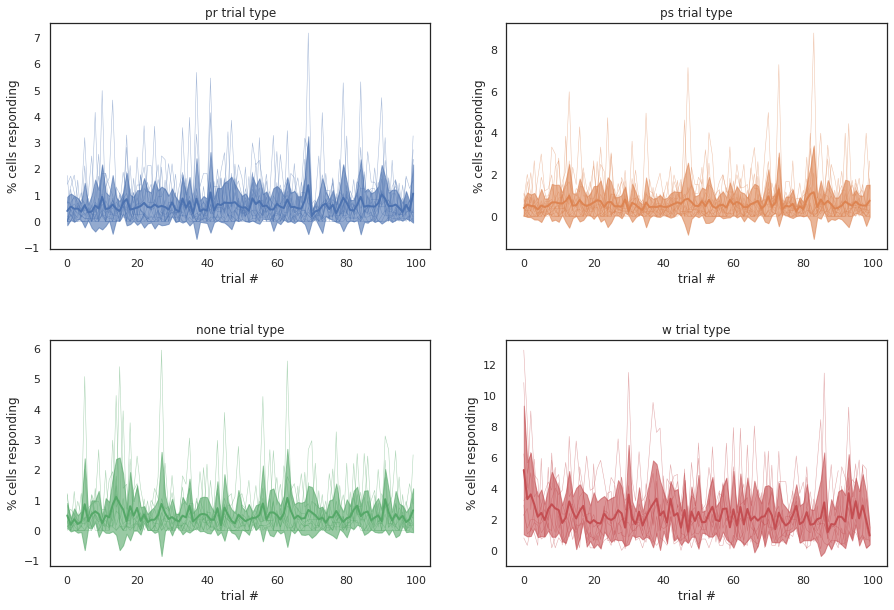

In [5]:
save = False
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10),
                         gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

for stim_id, ax in enumerate(axes.flat):
    
    stim_type = stim_types[stim_id]
    
    stims = np.array(['pr', 'ps', 'w', 'none'])
    colours = np.array(['C0', 'C1', 'C3', 'C2'])
    stim_colour = colours[np.where(stims==stim_type)][0]
    
    mean_trial_responses = np.nanmean(all_trial_responses[stim_id], axis=0)
    std_trial_responses = np.nanstd(all_trial_responses[stim_id], axis=0)
    x = np.arange(mean_trial_responses.shape[0])
    
    ax.plot(np.tile(x, 8).reshape(8,100).T, all_trial_responses[stim_id].T, color=stim_colour, lw=0.5, alpha=0.5, zorder=2);
    ax.plot(x, mean_trial_responses, lw=2, color=stim_colour, zorder=3);
    ax.fill_between(x, mean_trial_responses + std_trial_responses, mean_trial_responses - std_trial_responses, color=stim_colour, alpha=0.6, zorder=1);
    ax.set_xlabel('trial #');
    ax.set_ylabel('% cells responding');
    ax.set_title(stim_type + ' trial type');
    
if save:
    save_path = os.path.join(fig_save_path, 
                         'frequency_responses', 
                         'all_trial_averages', 
                         'average_cell_responses_trial_s2.png') # save path for figures
    fig.savefig(save_path)

### Plot the normalised cumulative frequency of response probabilities for all animals

In [10]:
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = [file for file in os.listdir(pkl_folder) if 'J061.pkl' in file]

all_prob_response = [[] for stim in stim_types]

for i,pkl in enumerate(pkl_files):
    
    pkl_path = os.path.join(pkl_folder, pkl)

    with open(pkl_path, 'rb') as f:
        ses_obj = pickle.load(f)

    exp_list = []
    exp_list.extend([ses_obj.photostim_r, 
                     ses_obj.photostim_s])
    exp_list.append(ses_obj.spont if ses_obj.spont.n_frames > 0 else [])            
    exp_list.append(ses_obj.whisker_stim if ses_obj.whisker_stim.n_frames > 0 else [])
    
    for stim_id, stim_type in enumerate(stim_types):

        for _,obj in enumerate(exp_list):
            
            if obj.stim_type == stim_type:
                
                all_prob_response[stim_id].extend(obj.prob_response[0])

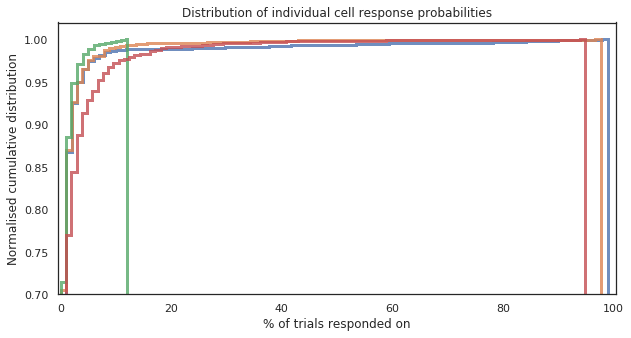

In [21]:
save = False

plt.figure(figsize=(10,5))
for stim_id, stim_type in enumerate(stim_types):
    prob_response = np.array(all_prob_response[stim_id])
    plt.hist(prob_response*100, bins=100, 
             cumulative=True, density=True, histtype='step',
             alpha=0.8, lw=3);
    
plt.axis([-0.5, 100.5, 0.7, 1.02]);
plt.title('Distribution of individual cell response probabilities')
plt.xlabel('% of trials responded on');
plt.ylabel('Normalised cumulative distribution');

if save:
    save_path = os.path.join(fig_save_path, 
                         'frequency_responses', 
                         'all_cells', 
                         'distribution_cell_response_probability.png') # save path for figures
    plt.savefig(save_path)

### Collate/plot response amplitudes over time (cell sum and mean) for each exp

/home/rlees/Documents/Code/Vape/jupyter/rob/ia_funcs.py:748: RuntimeWarning: Mean of empty slice
  trial_amp_means = np.nanmean(resp_cell_amps, axis=0)


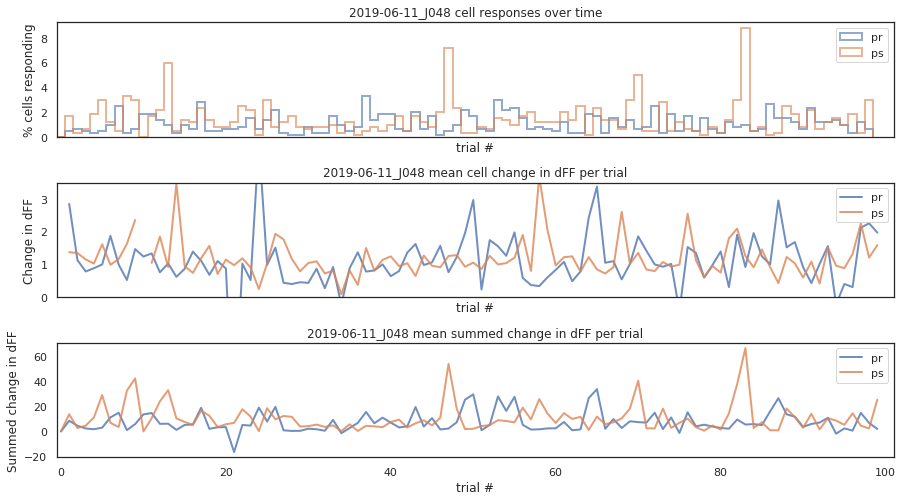

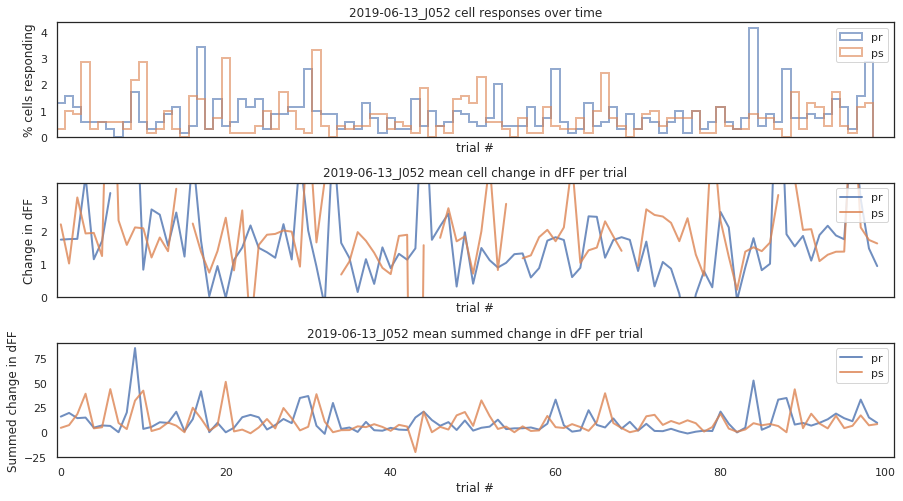

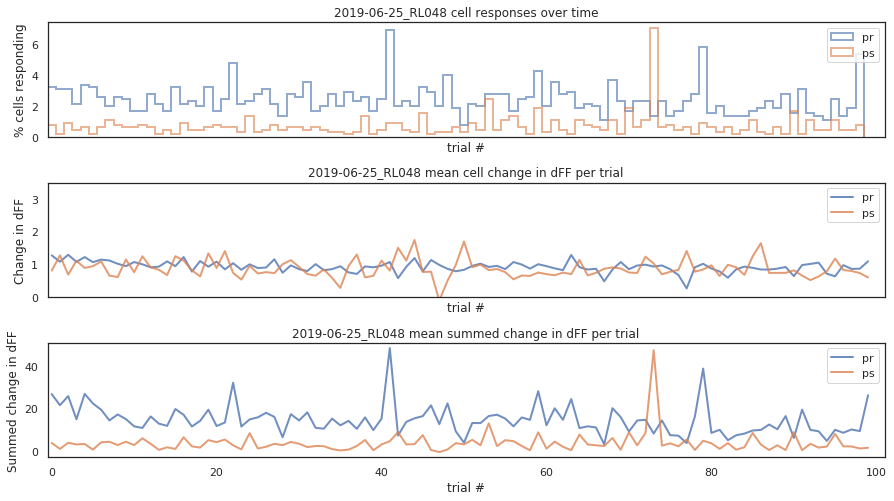

AttributeError: 'interarealAnalysis' object has no attribute 'trial_sig_dff'

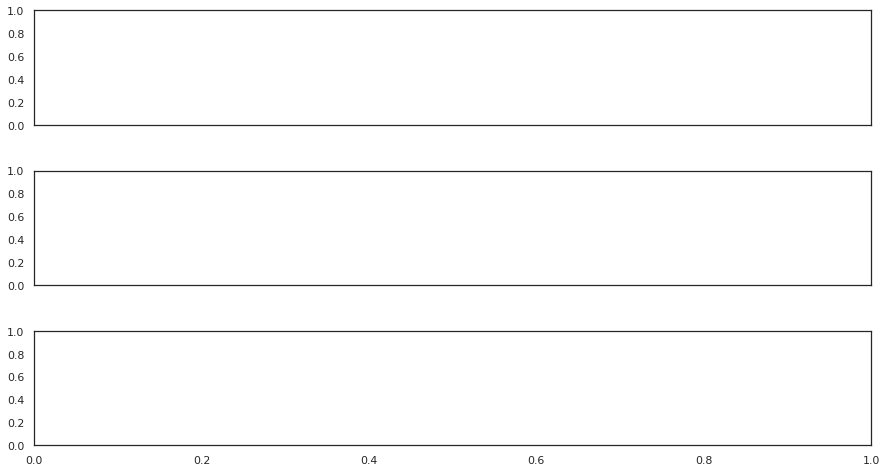

In [7]:
plot = True
save = False

stim_types = ['pr', 
              'ps',
#               'none', 
#               'w'
             ]
pkl_files = [file for file in os.listdir(pkl_folder) if '.pkl' in file]

all_trial_cell_amps = np.full([len(stim_types), len(pkl_files), 100], np.nan)
all_trial_sum_amps = np.full([len(stim_types), len(pkl_files), 100], np.nan)

for i,pkl in enumerate(pkl_files):

    pkl_path = os.path.join(pkl_folder, pkl)

    with open(pkl_path, 'rb') as f:
        ses_obj = pickle.load(f)

    exp_list = []
    exp_list.extend([ses_obj.photostim_r, 
                     ses_obj.photostim_s])
    if ses_obj.spont.n_frames > 0: exp_list.append(ses_obj.spont)            
    if ses_obj.whisker_stim.n_frames > 0: exp_list.append(ses_obj.whisker_stim)
    
    trial_fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,8), 
                                       sharex=True, gridspec_kw={'hspace' : 0.4})
    
    for stim_id, stim_type in enumerate(stim_types):

        for _,obj in enumerate(exp_list):
            if obj.stim_type == stim_type:
                trial_bool = obj.trial_sig_dff[0]
#                 cells_bool = obj.sta_sig[0] # significant cells over 100 trials
#                 cells_bool = obj.targeted_cells # targeted cells
                cells_bool = obj.cell_s2[0]
#                 cells_bool = np.ones(obj.n_units[0], dtype='bool') # all cells

                # continue through loop if there are no cells of interest
                if np.sum(cells_bool) == 0:
                    continue
                
                trial_amp_sum = responseAmpSumTrial(obj, trial_bool, cells_bool)
                trial_amp_means = responseAmpTrial(obj, trial_bool, cells_bool)
                
                # collate data from different animals
                n_trials = trial_amp_sum.shape[0]
                all_trial_cell_amps[stim_id, i, :n_trials] = trial_amp_means
                all_trial_sum_amps[stim_id, i, :n_trials] = trial_amp_sum
                
                if plot:
                    plotResponseFreqTrial(obj, trial_bool, cells_bool, axes[0])
                    plotResponseAmpTrial(obj, trial_bool, cells_bool, axes[1])
                    plotResponseAmpSumTrial(obj, trial_bool, cells_bool, axes[2])
    
    plt.show()
        
    if save:
        save_path = os.path.join(fig_save_path, 
                     'amplitude_responses', 
                     'photostim_trials', 
                     obj.sheet_name + '_response_amplitude_trial_s2.png') # save path for figures
        trial_fig.savefig(save_path)

/home/rlees/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


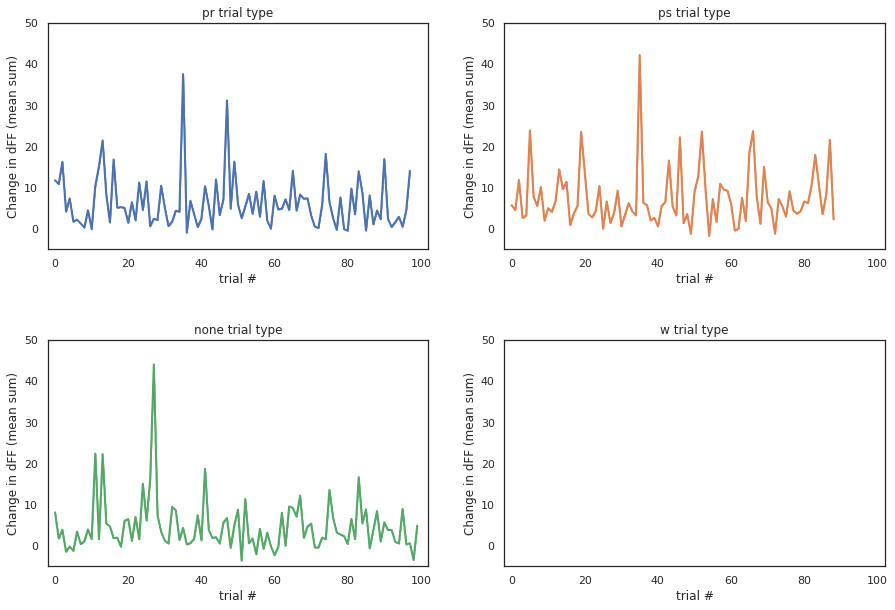

In [17]:
# Plot results from the above cell

data = all_trial_sum_amps
stim_types = ['pr', 'ps', 'none', 'w']

save = False
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10),
                         gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

for stim_id, ax in enumerate(axes.flat):
    
    stim_type = stim_types[stim_id]
    
    plot_colour = plotColour(stim_type)
    
    mean_trial_responses = np.nanmean(data[stim_id], axis=0)
    std_trial_responses = np.nanstd(data[stim_id], axis=0)
    x = np.arange(mean_trial_responses.shape[0])
    
    ax.plot(np.tile(x, 8).reshape(8,100).T, data[stim_id].T, color=plot_colour, lw=0.5, alpha=0.5, zorder=2);
    ax.plot(x, mean_trial_responses, lw=2, color=plot_colour, zorder=3);
    ax.fill_between(x, mean_trial_responses + std_trial_responses, mean_trial_responses - std_trial_responses, color=plot_colour, alpha=0.6, zorder=1);
    ax.set_xlabel('trial #');
    ax.set_ylabel('Change in dFF (mean sum)');
    ax.set_title(stim_type + ' trial type');
    ax.axis([-2, 102, -5, 50])

if save:
    save_path = os.path.join(fig_save_path, 
                         'amplitude_responses', 
                         'all_trial_averages', 
                         'average_sum_dff_trial_s2.png') # save path for figures
    fig.savefig(save_path)